# ELAIS-N2 master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
37d9c0f (Tue Jul 18 17:43:07 2017 +0100)


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn2

from herschelhelp_internal.masterlist import nb_compare_mags, nb_ccplots, nb_histograms

In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = os.environ.get('SUFFIX', time.strftime("_%Y%m%d"))
#SUFFIX = "_20170710"

master_catalogue = Table.read("{}/master_catalogue_elais-n2{}.fits".format(OUT_DIR, SUFFIX))

## I - Summary of wavelength domains

In [4]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

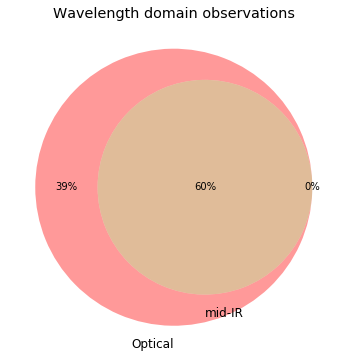

In [5]:
venn2(
    [
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 4),
        np.sum(flag_obs == 5)
    ],
    set_labels=('Optical', 'mid-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

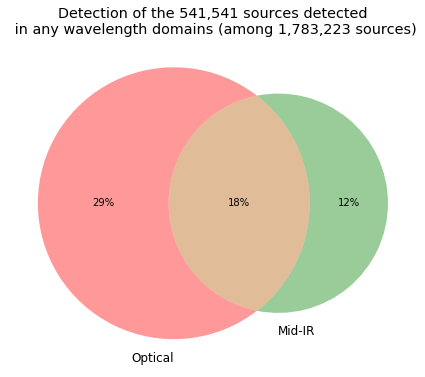

In [6]:
venn2(
    [
        np.sum(flag_det[flag_obs == 5] == 1),
        np.sum(flag_det[flag_obs == 5] == 4),
        np.sum(flag_det[flag_obs == 5] == 5)
    ],
    set_labels=('Optical', 'Mid-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [7]:
u_bands = ["WFC u", "CFHT Megacam u"]
g_bands = ["WFC g", "CFHT Megacam g", "GPC1 g", "RCS g"]
r_bands = ["WFC r", "CFHT Megacam r", "GPC1 r", "RCS r"]
i_bands = ["WFC i",                   "GPC1 i", "RCS i"]
z_bands = ["WFC z", "CFHT Megacam z", "GPC1 z", "RCS z"]
y_bands = [                           "GPC1 y", "RCS y"]

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

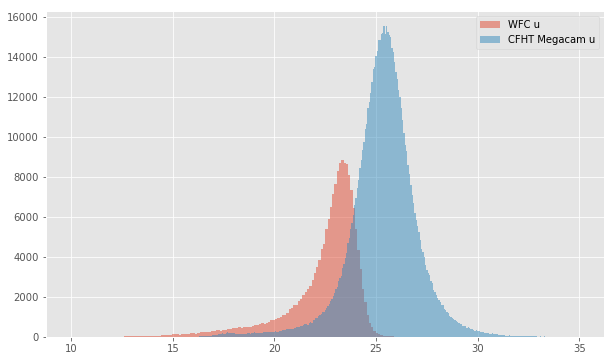

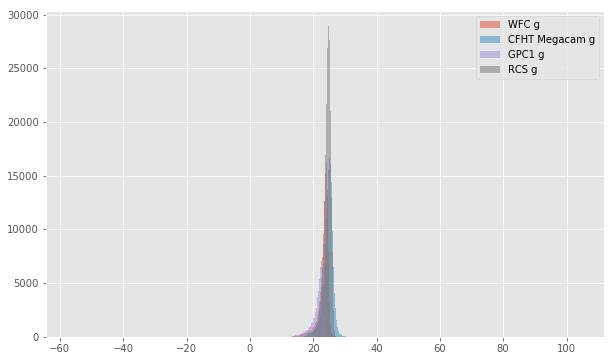

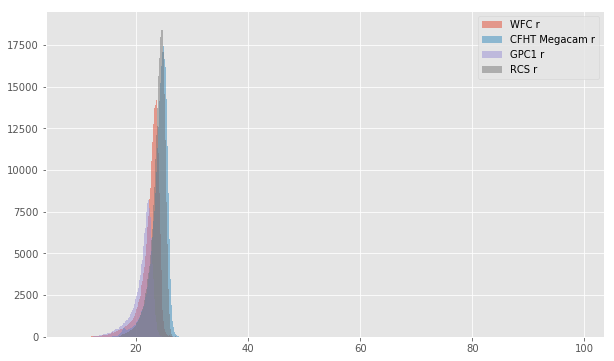

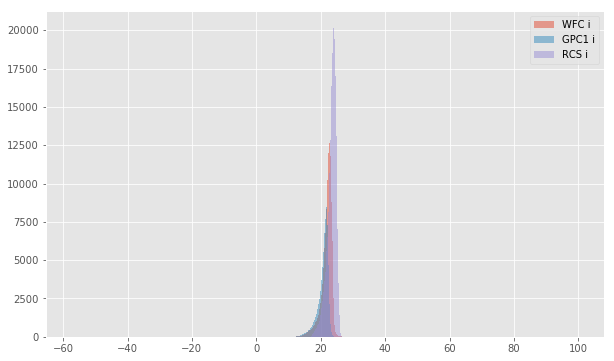

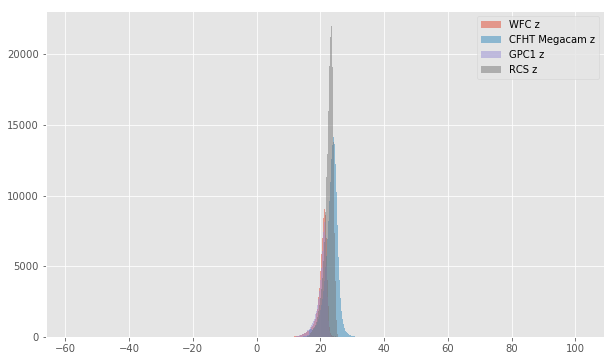

HELP warning: One or more of the columns is empty.


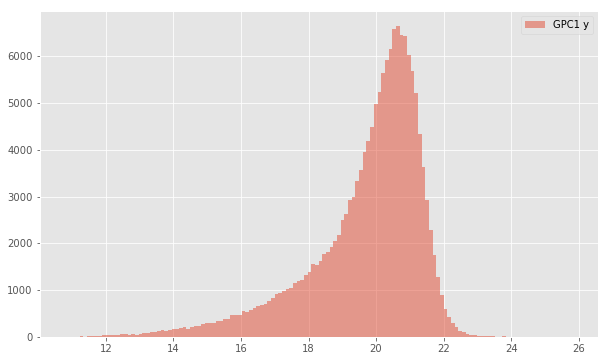

In [8]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

CFHT Megacam u (aperture) - WFC u (aperture):
- Median: -0.04
- Median Absolute Deviation: 0.25
- 1% percentile: -0.8018979835510254
- 99% percentile: 3.7088455772399915


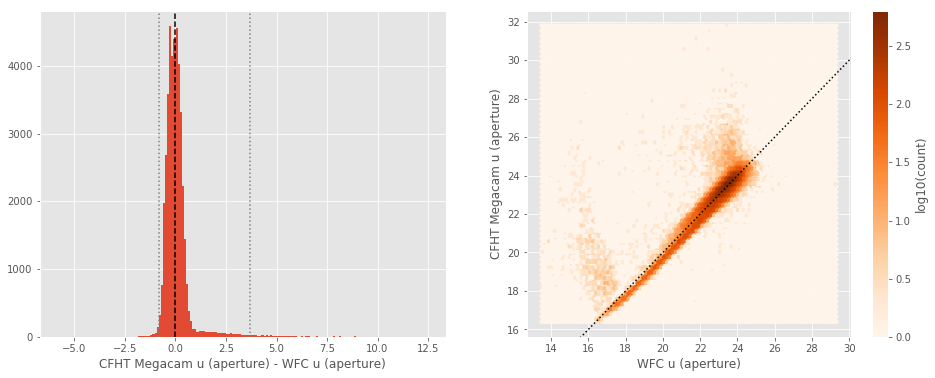

CFHT Megacam u (total) - WFC u (total):
- Median: -0.24
- Median Absolute Deviation: 0.20
- 1% percentile: -1.133989028930664
- 99% percentile: 2.9416127777099588


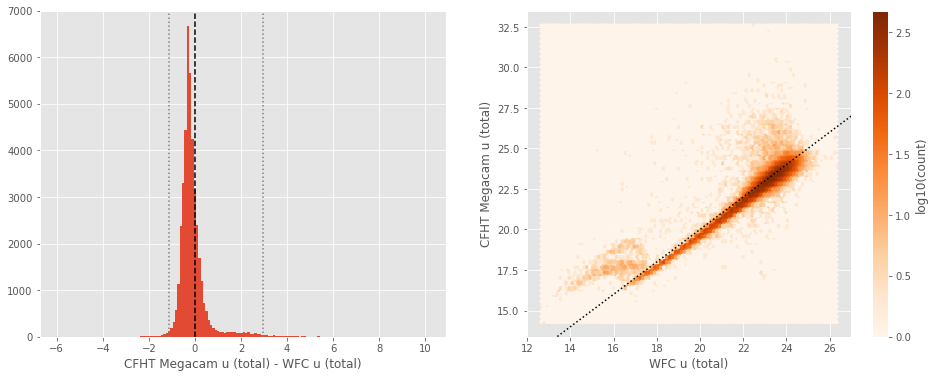

CFHT Megacam g (aperture) - WFC g (aperture):
- Median: 0.07
- Median Absolute Deviation: 0.16
- 1% percentile: -0.6488978195190429
- 99% percentile: 1.2106095886230488


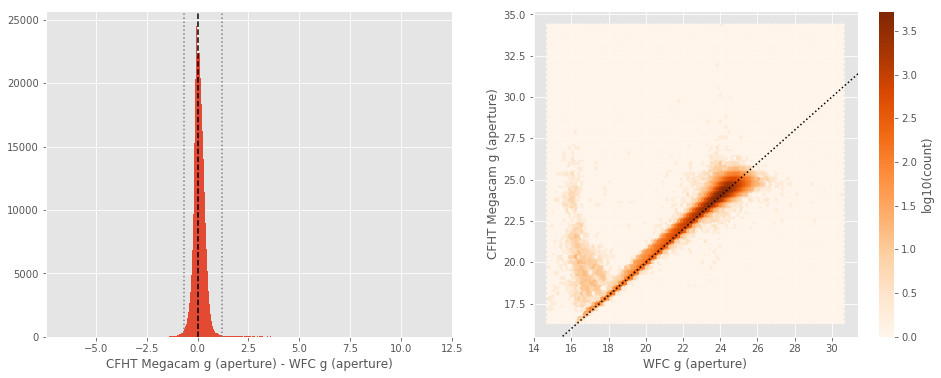

CFHT Megacam g (total) - WFC g (total):
- Median: -0.06
- Median Absolute Deviation: 0.15
- 1% percentile: -1.013030776977539
- 99% percentile: 2.029975814819333


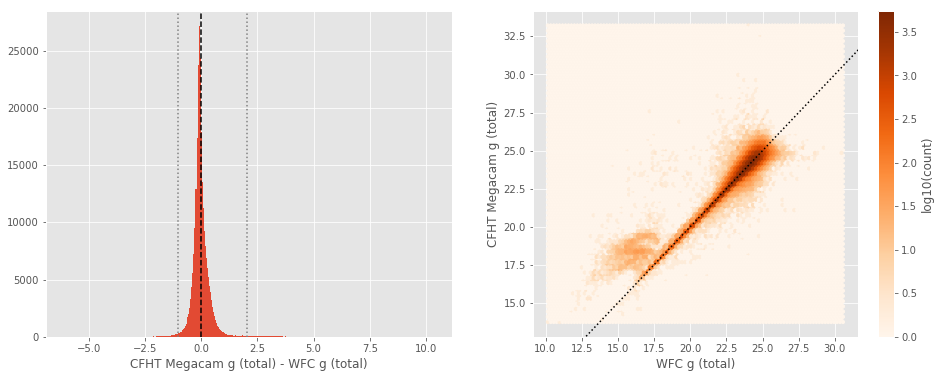

GPC1 g (aperture) - WFC g (aperture):
- Median: -0.04
- Median Absolute Deviation: 0.21
- 1% percentile: -1.409198970794678
- 99% percentile: 2.3876510620117206


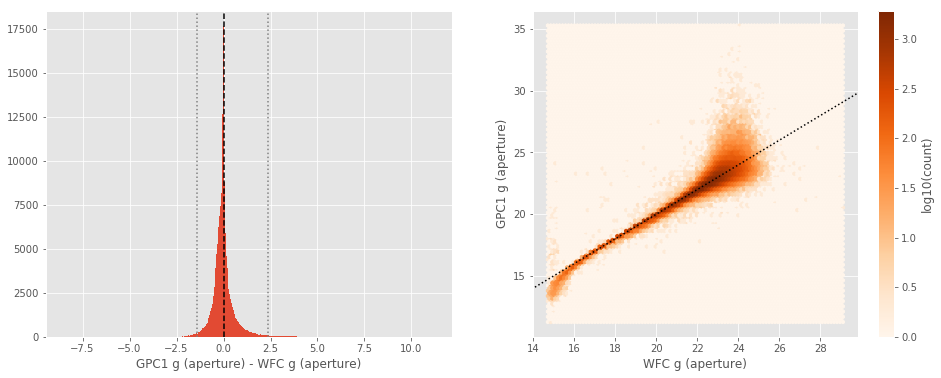

GPC1 g (total) - WFC g (total):
- Median: 0.02
- Median Absolute Deviation: 0.14
- 1% percentile: -1.259632263183594
- 99% percentile: 0.8684431457519534


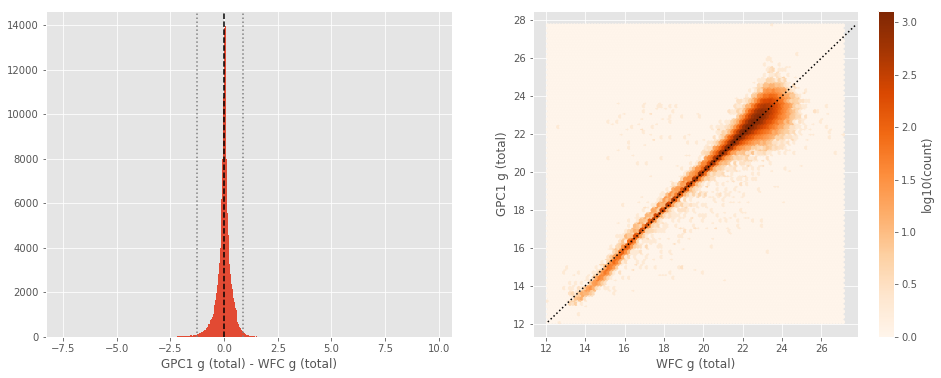

There are no overlapping magnitudes...
RCS g (total) - WFC g (total):
- Median: -0.09
- Median Absolute Deviation: 0.17
- 1% percentile: -1.1273002624511719
- 99% percentile: 1.1714000701904297


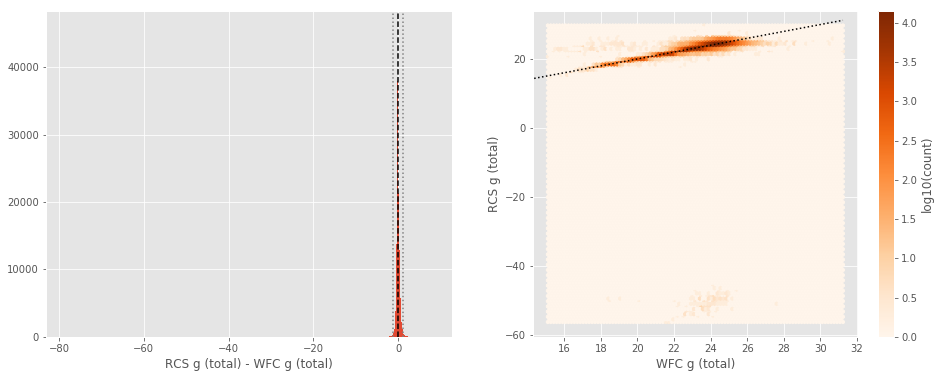

GPC1 g (aperture) - CFHT Megacam g (aperture):
- Median: -0.10
- Median Absolute Deviation: 0.30
- 1% percentile: -3.1742844581604004
- 99% percentile: 2.404479503631592


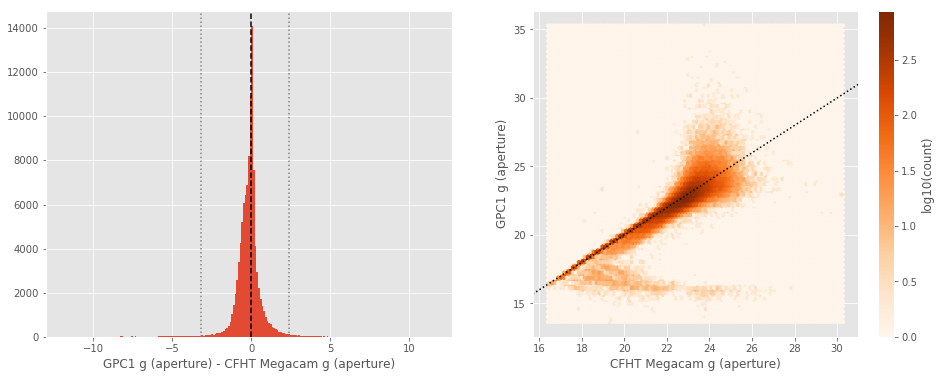

GPC1 g (total) - CFHT Megacam g (total):
- Median: 0.09
- Median Absolute Deviation: 0.14
- 1% percentile: -3.2294483184814453
- 99% percentile: 0.9065727233886673


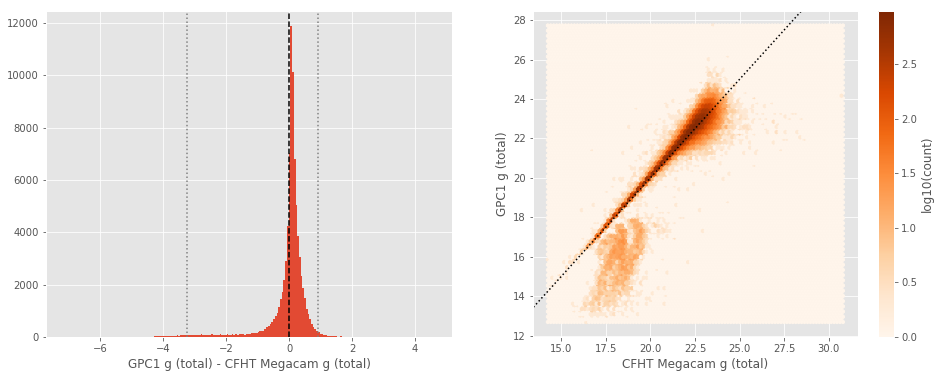

There are no overlapping magnitudes...
RCS g (total) - CFHT Megacam g (total):
- Median: -0.03
- Median Absolute Deviation: 0.15
- 1% percentile: -1.1794805526733398
- 99% percentile: 1.0631583595275873


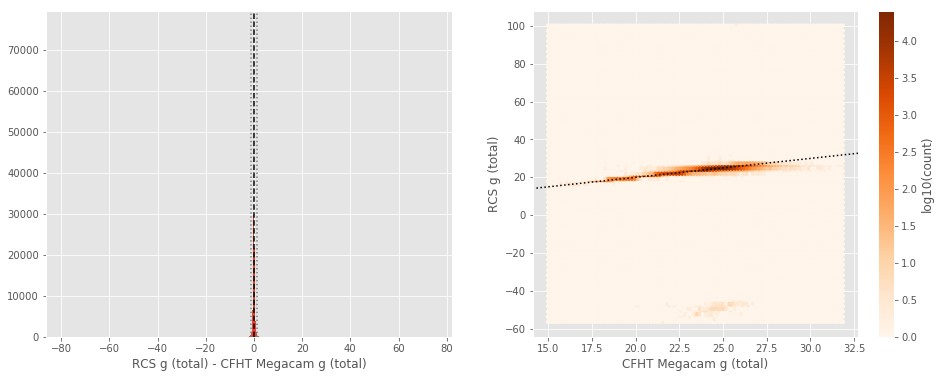

There are no overlapping magnitudes...
RCS g (total) - GPC1 g (total):
- Median: -0.14
- Median Absolute Deviation: 0.14
- 1% percentile: -0.9783744812011719
- 99% percentile: 1.1184496879577637


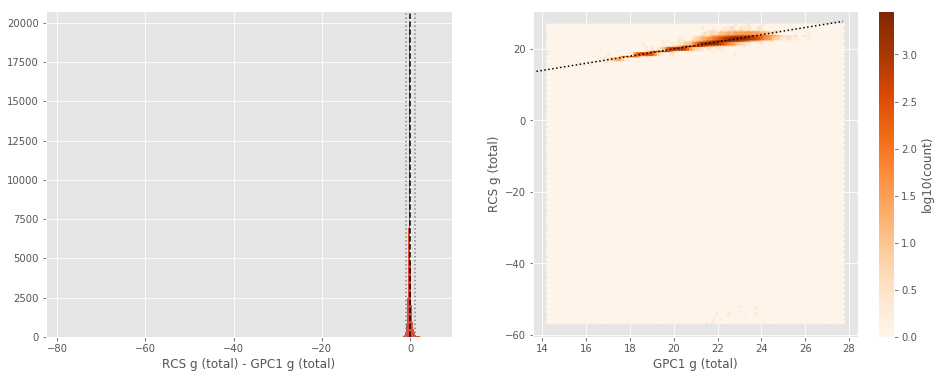

CFHT Megacam r (aperture) - WFC r (aperture):
- Median: 0.06
- Median Absolute Deviation: 0.15
- 1% percentile: -0.6783035278320313
- 99% percentile: 1.7159394073486296


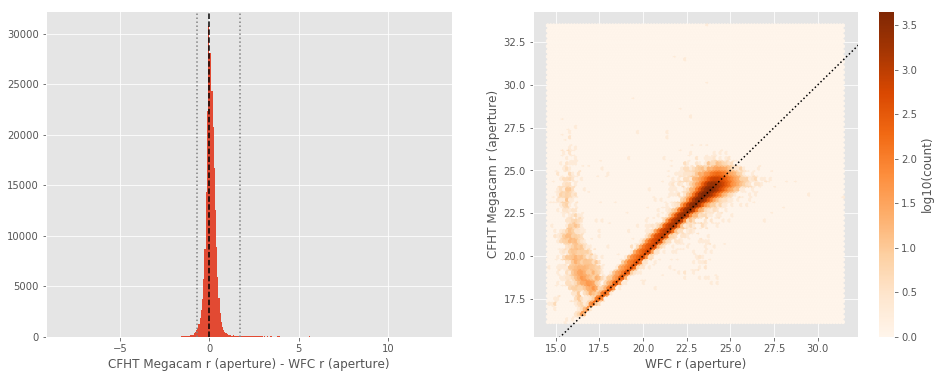

CFHT Megacam r (total) - WFC r (total):
- Median: -0.10
- Median Absolute Deviation: 0.14
- 1% percentile: -1.0879096031188964
- 99% percentile: 2.0215468215942365


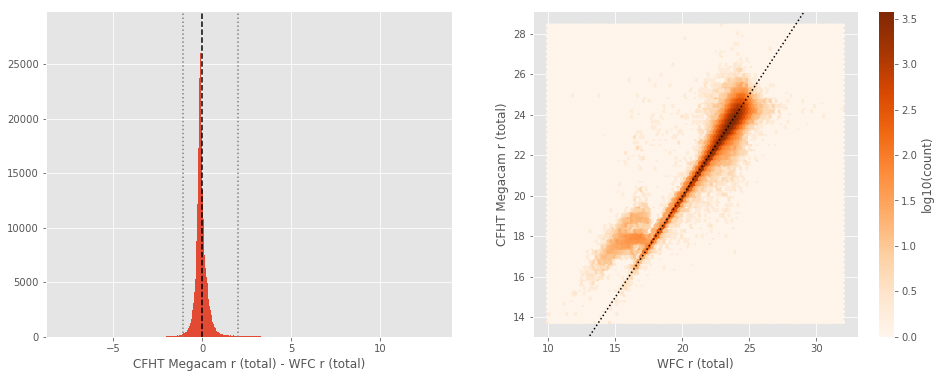

GPC1 r (aperture) - WFC r (aperture):
- Median: -0.05
- Median Absolute Deviation: 0.12
- 1% percentile: -0.9961013793945312
- 99% percentile: 1.3988991737365724


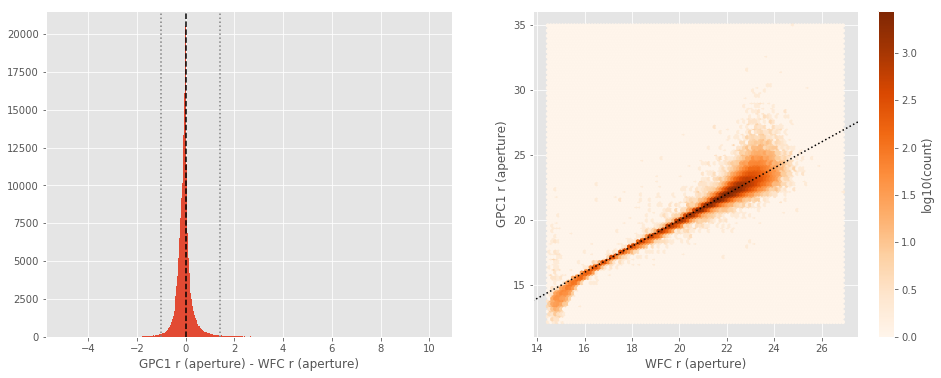

GPC1 r (total) - WFC r (total):
- Median: 0.01
- Median Absolute Deviation: 0.11
- 1% percentile: -0.9179030799865723
- 99% percentile: 0.7981997108459482


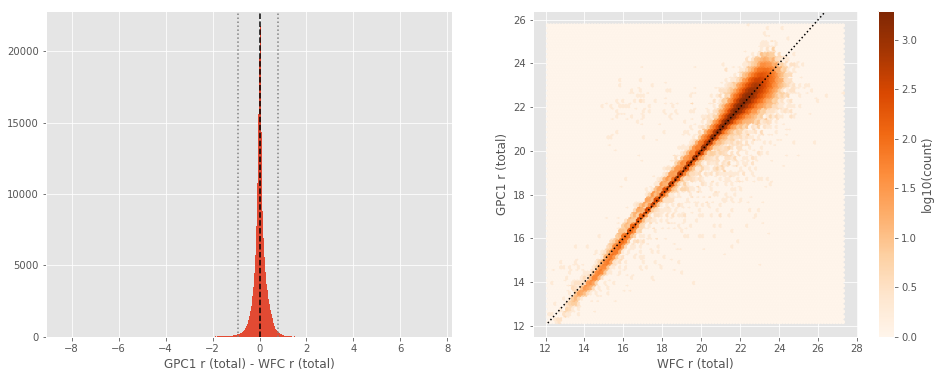

There are no overlapping magnitudes...
RCS r (total) - WFC r (total):
- Median: -0.14
- Median Absolute Deviation: 0.14
- 1% percentile: -1.1533707427978517
- 99% percentile: 1.0309009552001953


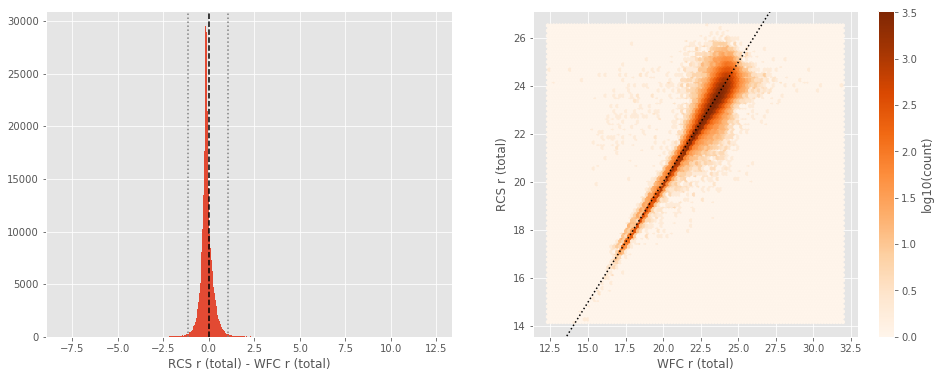

GPC1 r (aperture) - CFHT Megacam r (aperture):
- Median: -0.11
- Median Absolute Deviation: 0.21
- 1% percentile: -3.751292018890381
- 99% percentile: 1.4144266510009773


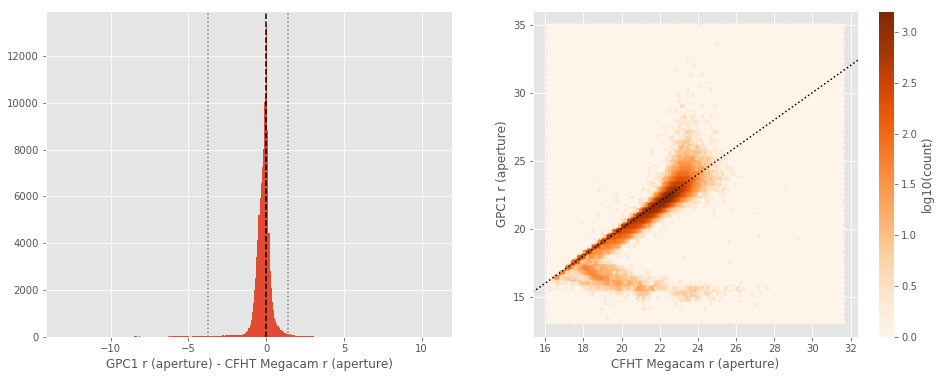

GPC1 r (total) - CFHT Megacam r (total):
- Median: 0.11
- Median Absolute Deviation: 0.10
- 1% percentile: -2.8896341800689695
- 99% percentile: 0.8206905746459963


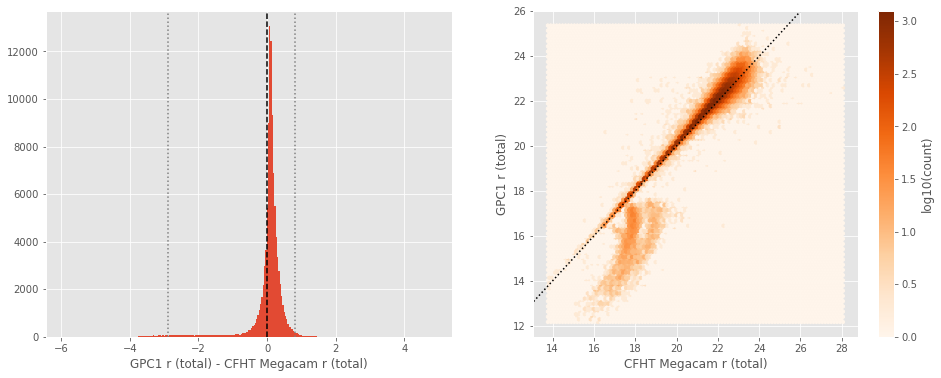

There are no overlapping magnitudes...
RCS r (total) - CFHT Megacam r (total):
- Median: -0.05
- Median Absolute Deviation: 0.15
- 1% percentile: -1.153233814239502
- 99% percentile: 1.0873112678527819


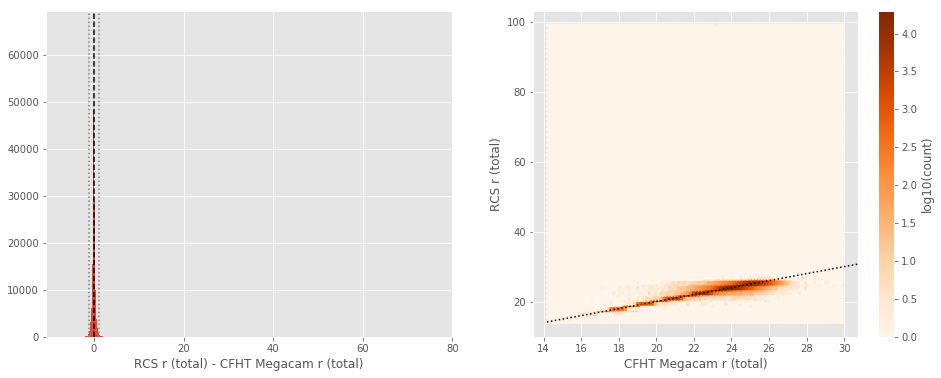

There are no overlapping magnitudes...
RCS r (total) - GPC1 r (total):
- Median: -0.16
- Median Absolute Deviation: 0.10
- 1% percentile: -0.8823718261718749
- 99% percentile: 0.626745071411132


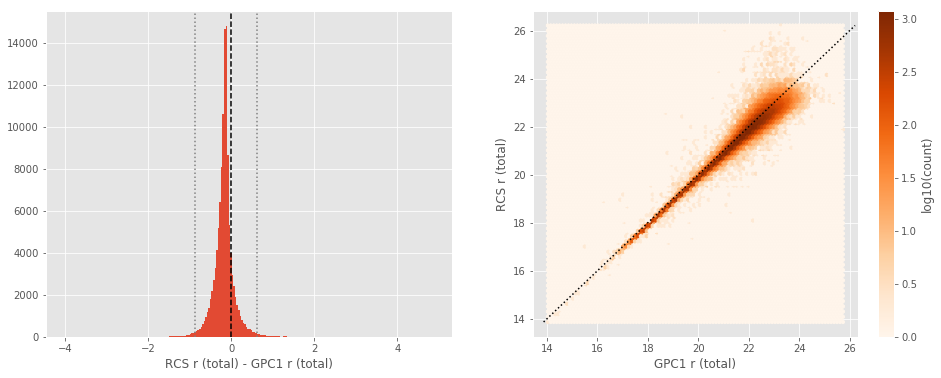

GPC1 i (aperture) - WFC i (aperture):
- Median: 0.00
- Median Absolute Deviation: 0.11
- 1% percentile: -0.8453998565673828
- 99% percentile: 0.9095308685302732


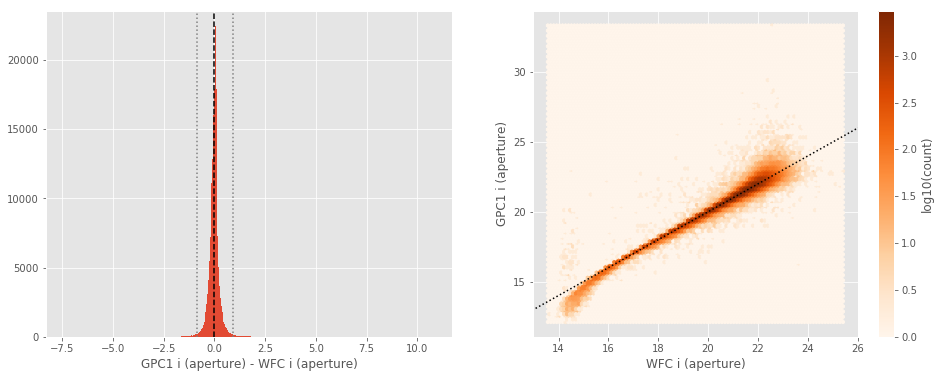

GPC1 i (total) - WFC i (total):
- Median: 0.07
- Median Absolute Deviation: 0.11
- 1% percentile: -0.7359315490722655
- 99% percentile: 0.8652436828613284


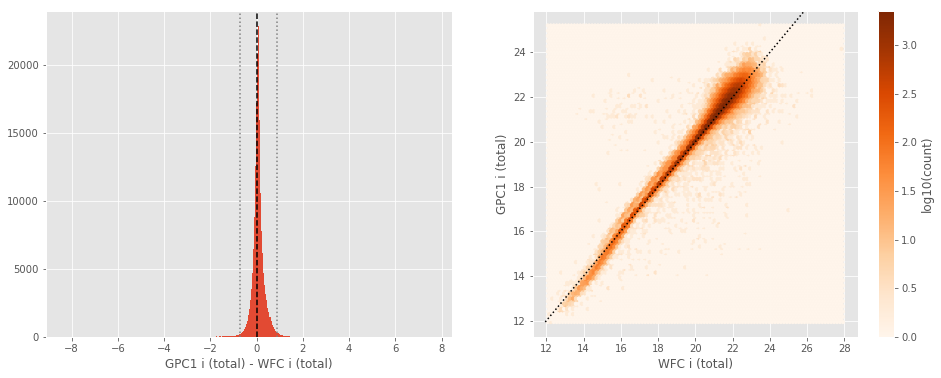

There are no overlapping magnitudes...
RCS i (total) - WFC i (total):
- Median: -0.10
- Median Absolute Deviation: 0.18
- 1% percentile: -1.1100502014160156
- 99% percentile: 1.3543500900268555


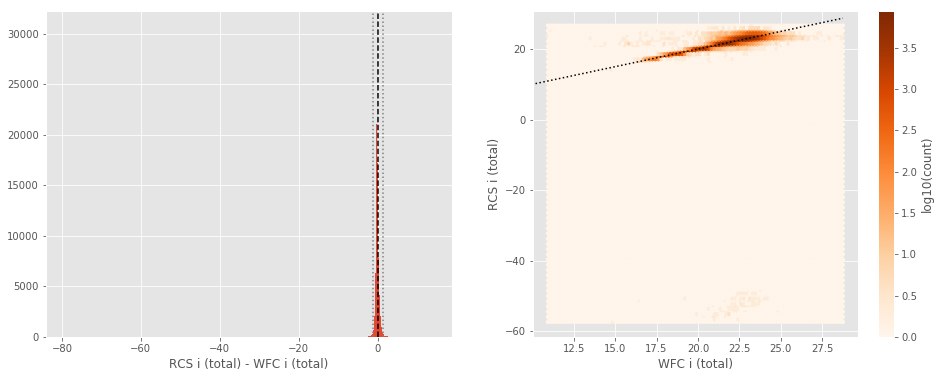

There are no overlapping magnitudes...
RCS i (total) - GPC1 i (total):
- Median: -0.20
- Median Absolute Deviation: 0.08
- 1% percentile: -0.8265383529663086
- 99% percentile: 0.4684374618530278


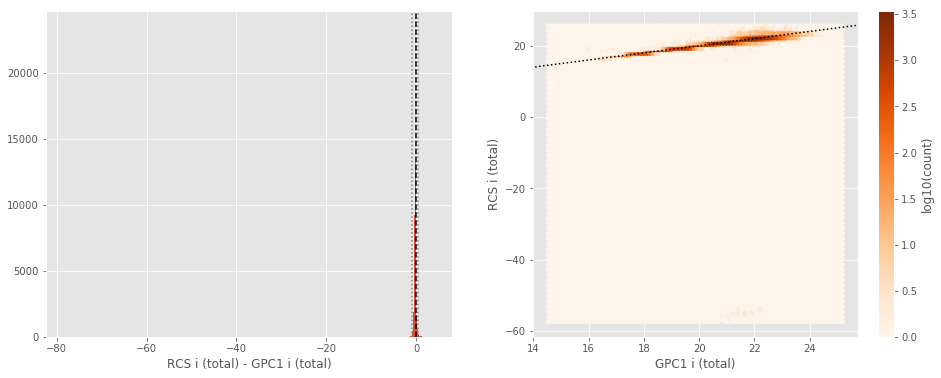

CFHT Megacam z (aperture) - WFC z (aperture):
- Median: 0.14
- Median Absolute Deviation: 0.17
- 1% percentile: -0.6702371978759765
- 99% percentile: 3.5893981742858516


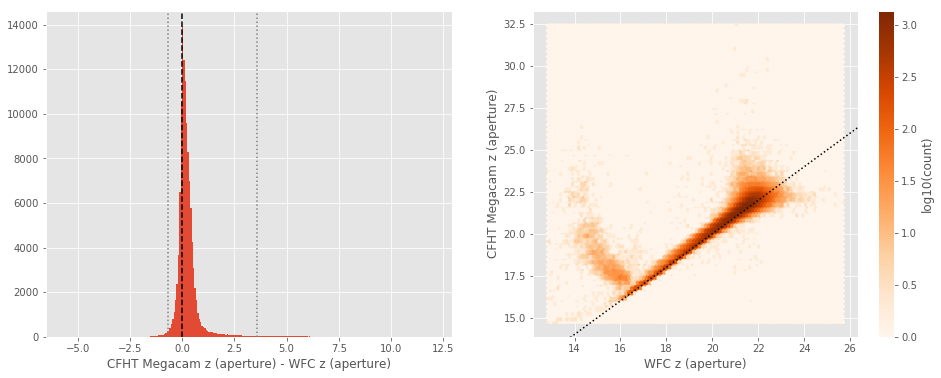

CFHT Megacam z (total) - WFC z (total):
- Median: -0.04
- Median Absolute Deviation: 0.20
- 1% percentile: -0.9459419250488281
- 99% percentile: 2.56119647979736


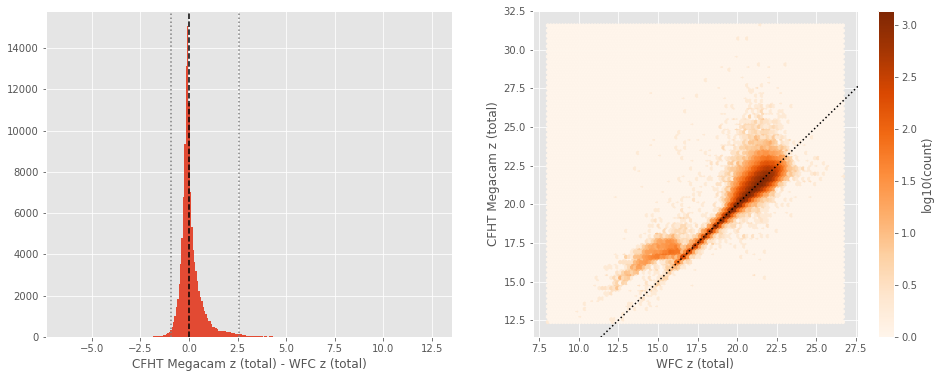

GPC1 z (aperture) - WFC z (aperture):
- Median: 0.03
- Median Absolute Deviation: 0.12
- 1% percentile: -0.8302993774414062
- 99% percentile: 1.1431929779052727


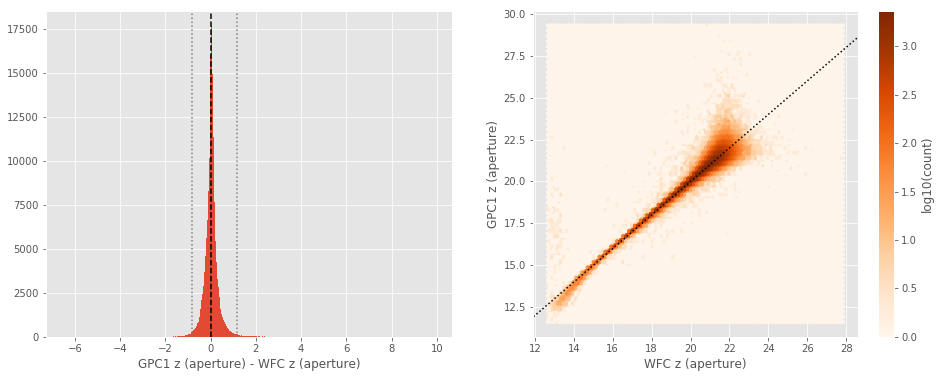

GPC1 z (total) - WFC z (total):
- Median: 0.08
- Median Absolute Deviation: 0.16
- 1% percentile: -0.8501208877563475
- 99% percentile: 1.371586303710937


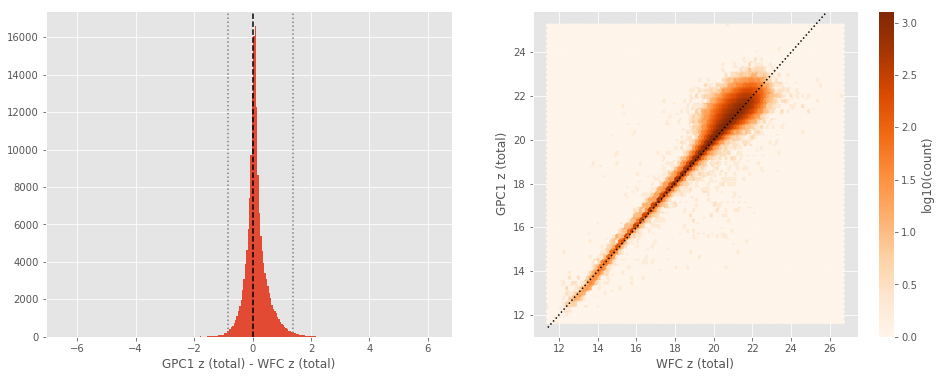

There are no overlapping magnitudes...
RCS z (total) - WFC z (total):
- Median: -0.07
- Median Absolute Deviation: 0.22
- 1% percentile: -1.0420454406738282
- 99% percentile: 1.9726009368896484


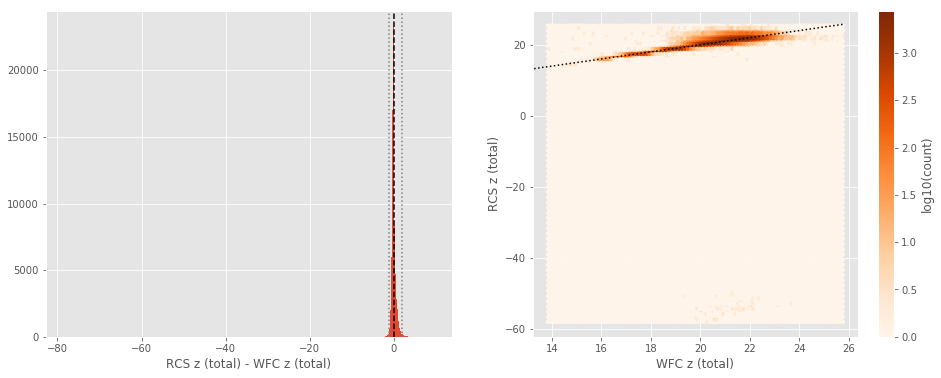

GPC1 z (aperture) - CFHT Megacam z (aperture):
- Median: -0.06
- Median Absolute Deviation: 0.19
- 1% percentile: -3.8111167526245113
- 99% percentile: 1.116339416503906


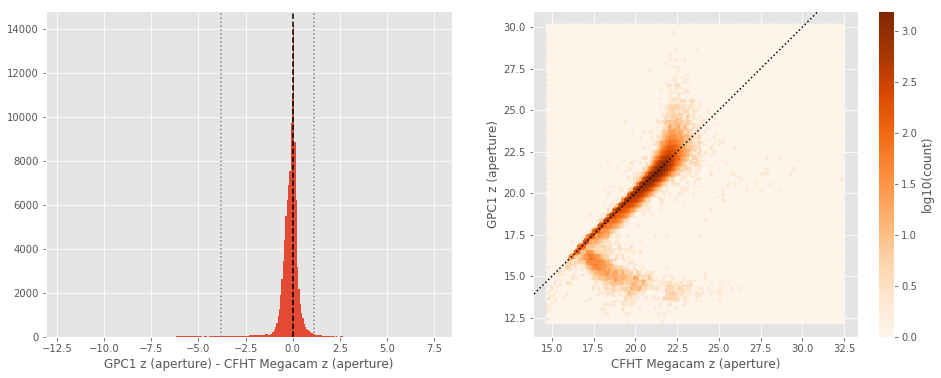

GPC1 z (total) - CFHT Megacam z (total):
- Median: 0.15
- Median Absolute Deviation: 0.10
- 1% percentile: -2.2986411094665526
- 99% percentile: 0.8422527313232419


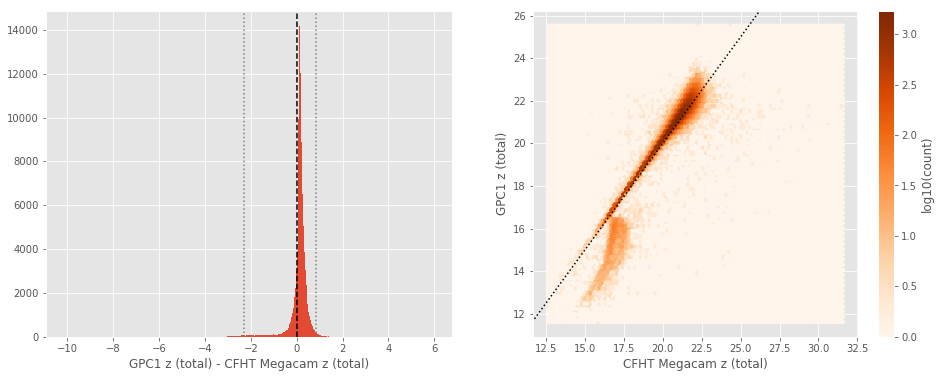

There are no overlapping magnitudes...
RCS z (total) - CFHT Megacam z (total):
- Median: -0.05
- Median Absolute Deviation: 0.24
- 1% percentile: -2.377850933074951
- 99% percentile: 1.2616420936584478


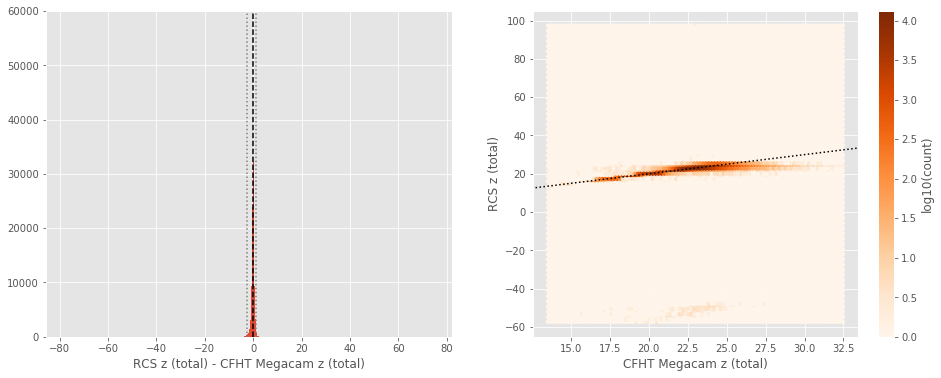

There are no overlapping magnitudes...
RCS z (total) - GPC1 z (total):
- Median: -0.18
- Median Absolute Deviation: 0.10
- 1% percentile: -0.9303009223937988
- 99% percentile: 0.5799712562561041


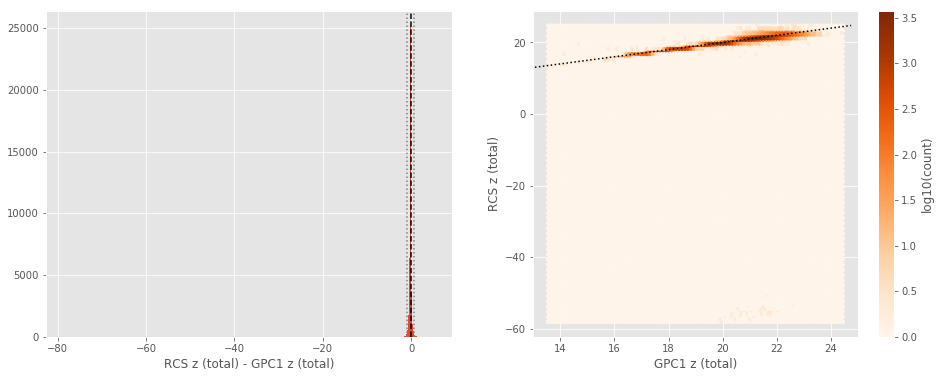

There are no overlapping magnitudes...
There are no overlapping magnitudes...


In [9]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS magnitudes.

In [10]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [11]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_ELAIS-N2.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

WFC u (aperture) - SDSS u (fiberMag):
- Median: -0.30
- Median Absolute Deviation: 0.18
- 1% percentile: -1.6183706665039062
- 99% percentile: 0.9621364212036125


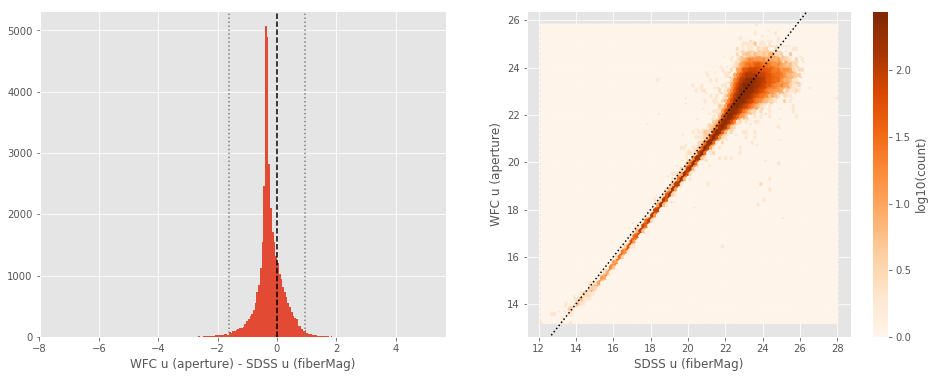

WFC u (total) - SDSS u (petroMag):
- Median: -0.30
- Median Absolute Deviation: 0.18
- 1% percentile: -1.6183706665039062
- 99% percentile: 0.9621364212036125


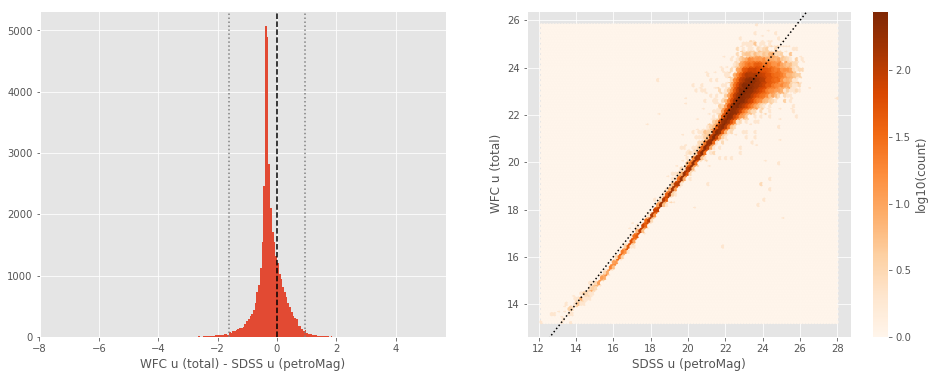

CFHT Megacam u (aperture) - SDSS u (fiberMag):
- Median: -0.04
- Median Absolute Deviation: 0.58
- 1% percentile: -1.6583412170410157
- 99% percentile: 3.297002315521247


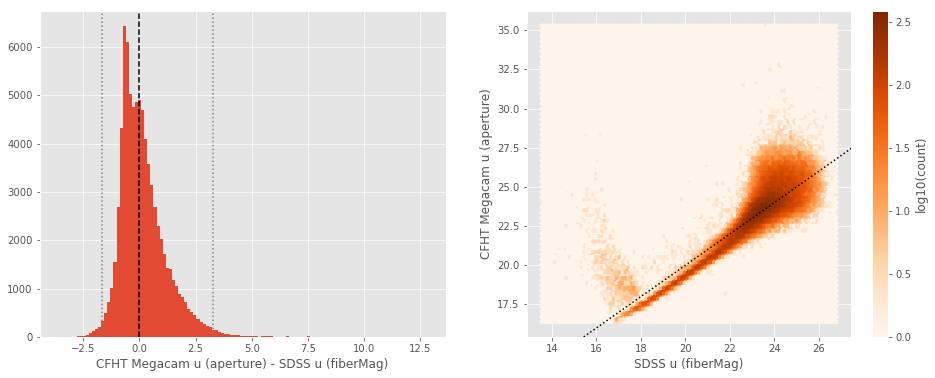

CFHT Megacam u (total) - SDSS u (petroMag):
- Median: -0.04
- Median Absolute Deviation: 0.58
- 1% percentile: -1.6583412170410157
- 99% percentile: 3.297002315521247


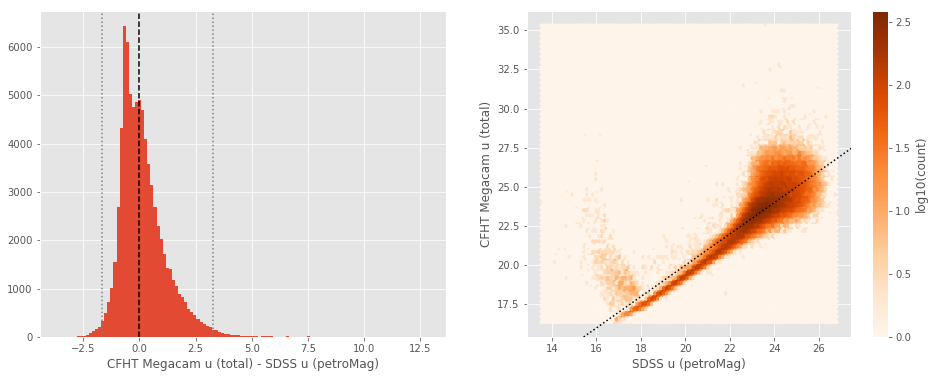

WFC g (aperture) - SDSS g (fiberMag):
- Median: -0.44
- Median Absolute Deviation: 0.11
- 1% percentile: -1.1331189155578614
- 99% percentile: 0.5049597740173323


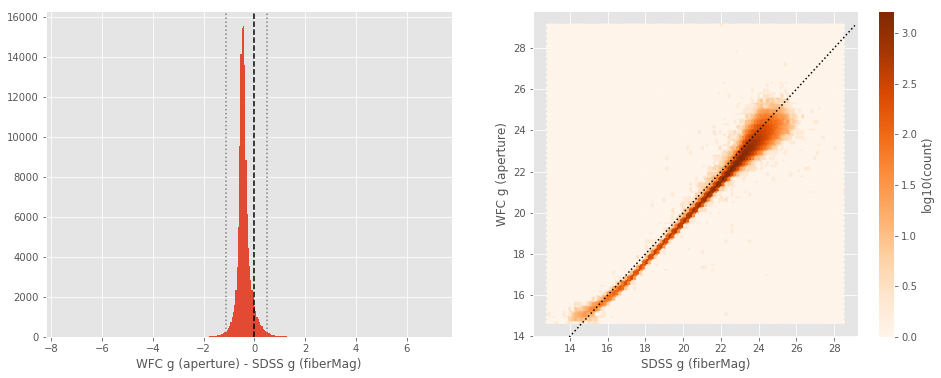

WFC g (total) - SDSS g (petroMag):
- Median: -0.44
- Median Absolute Deviation: 0.11
- 1% percentile: -1.1331189155578614
- 99% percentile: 0.5049597740173323


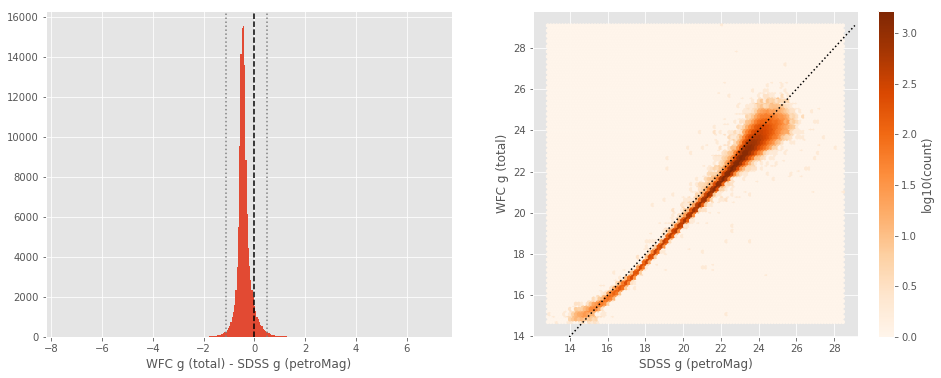

CFHT Megacam g (aperture) - SDSS g (fiberMag):
- Median: -0.36
- Median Absolute Deviation: 0.18
- 1% percentile: -1.1016152000427246
- 99% percentile: 3.0158825111388934


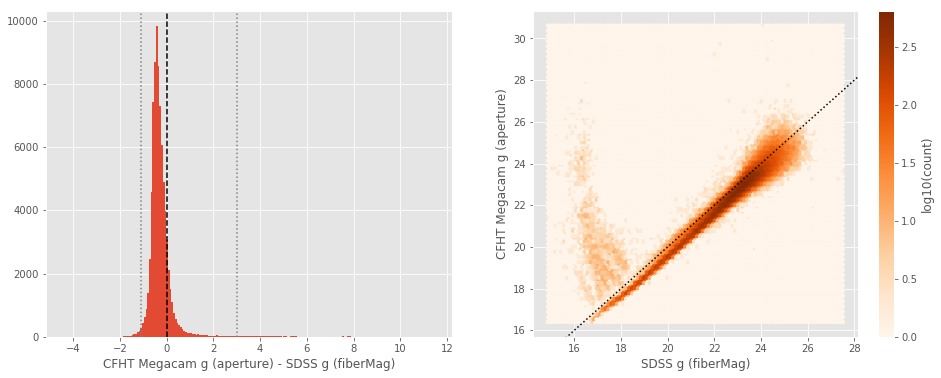

CFHT Megacam g (total) - SDSS g (petroMag):
- Median: -0.36
- Median Absolute Deviation: 0.18
- 1% percentile: -1.1016152000427246
- 99% percentile: 3.0158825111388934


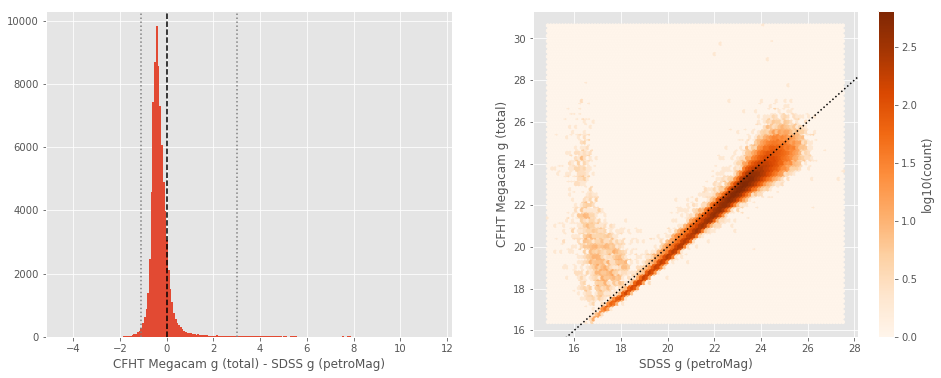

GPC1 g (aperture) - SDSS g (fiberMag):
- Median: -0.48
- Median Absolute Deviation: 0.19
- 1% percentile: -1.7155875587463378
- 99% percentile: 1.8861633110046394


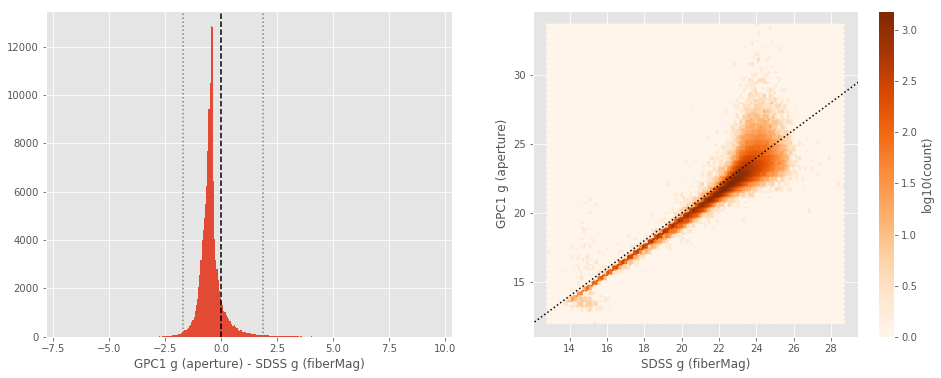

GPC1 g (total) - SDSS g (petroMag):
- Median: -0.48
- Median Absolute Deviation: 0.19
- 1% percentile: -1.7155875587463378
- 99% percentile: 1.8861633110046394


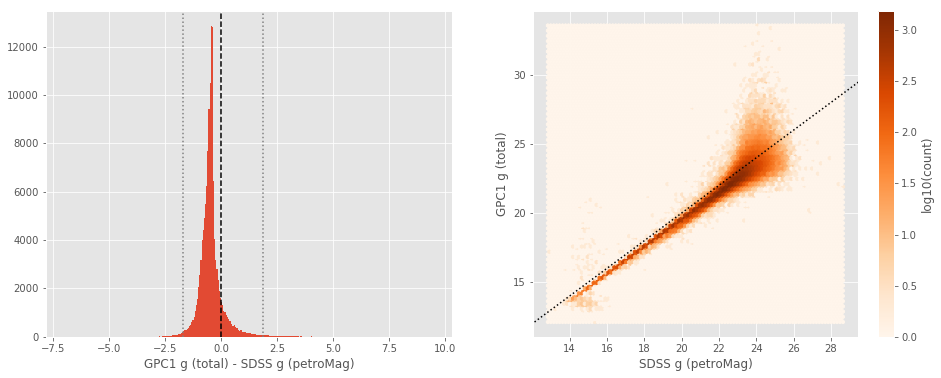

There are no overlapping magnitudes...
There are no overlapping magnitudes...
WFC r (aperture) - SDSS r (fiberMag):
- Median: -0.34
- Median Absolute Deviation: 0.07
- 1% percentile: -0.890346794128418
- 99% percentile: 0.36871064186096253


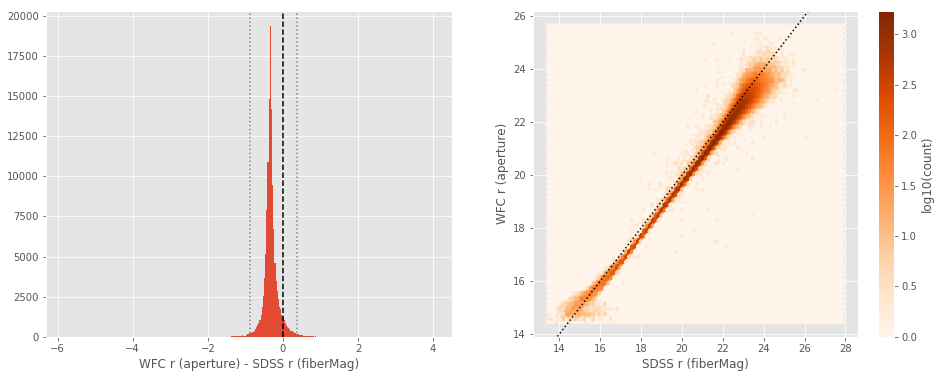

WFC r (total) - SDSS r (petroMag):
- Median: -0.34
- Median Absolute Deviation: 0.07
- 1% percentile: -0.890346794128418
- 99% percentile: 0.36871064186096253


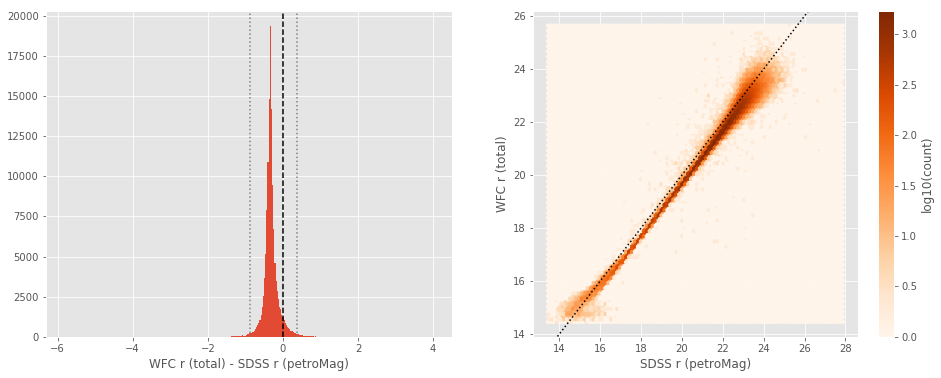

CFHT Megacam r (aperture) - SDSS r (fiberMag):
- Median: -0.27
- Median Absolute Deviation: 0.13
- 1% percentile: -0.8717788696289063
- 99% percentile: 3.9546873378753666


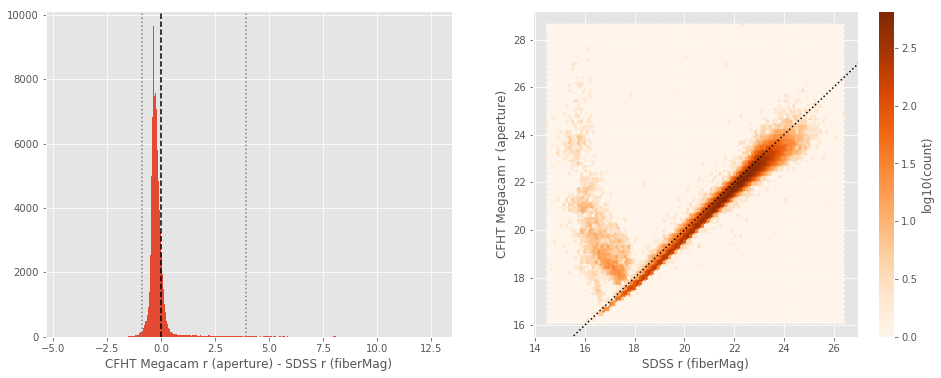

CFHT Megacam r (total) - SDSS r (petroMag):
- Median: -0.27
- Median Absolute Deviation: 0.13
- 1% percentile: -0.8717788696289063
- 99% percentile: 3.9546873378753666


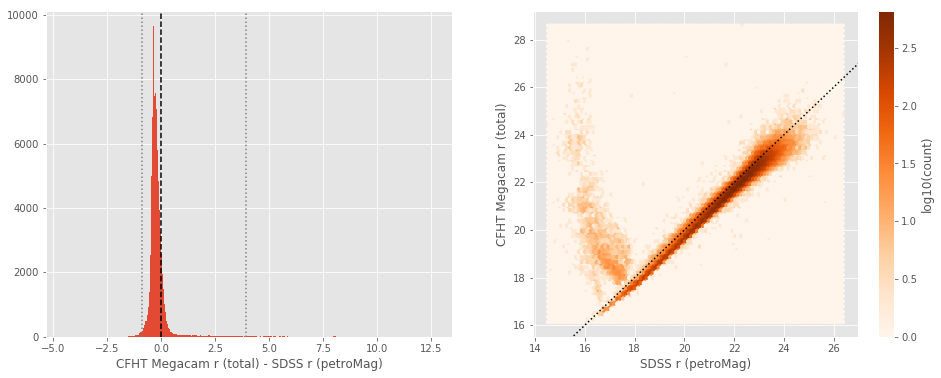

GPC1 r (aperture) - SDSS r (fiberMag):
- Median: -0.37
- Median Absolute Deviation: 0.11
- 1% percentile: -1.1465348052978515
- 99% percentile: 0.8678107452392576


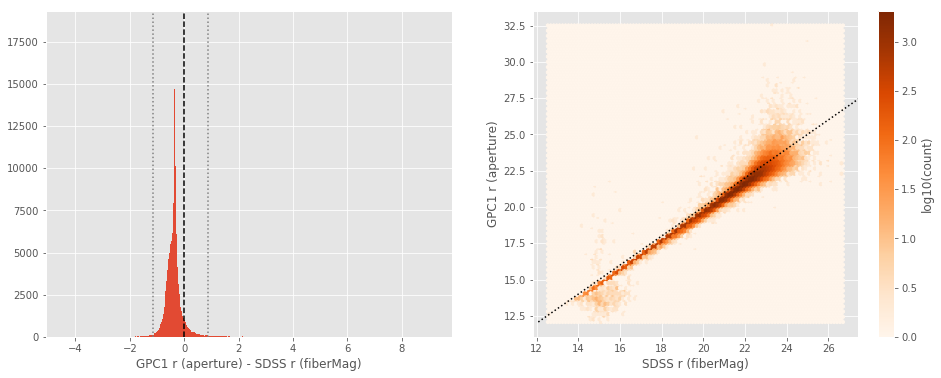

GPC1 r (total) - SDSS r (petroMag):
- Median: -0.37
- Median Absolute Deviation: 0.11
- 1% percentile: -1.1465348052978515
- 99% percentile: 0.8678107452392576


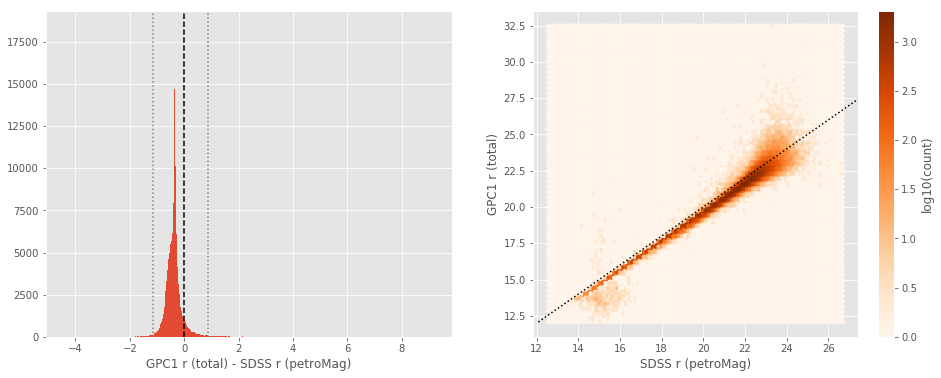

There are no overlapping magnitudes...
There are no overlapping magnitudes...
WFC i (aperture) - SDSS i (fiberMag):
- Median: -0.39
- Median Absolute Deviation: 0.08
- 1% percentile: -0.9288136291503907
- 99% percentile: 0.4154920196533197


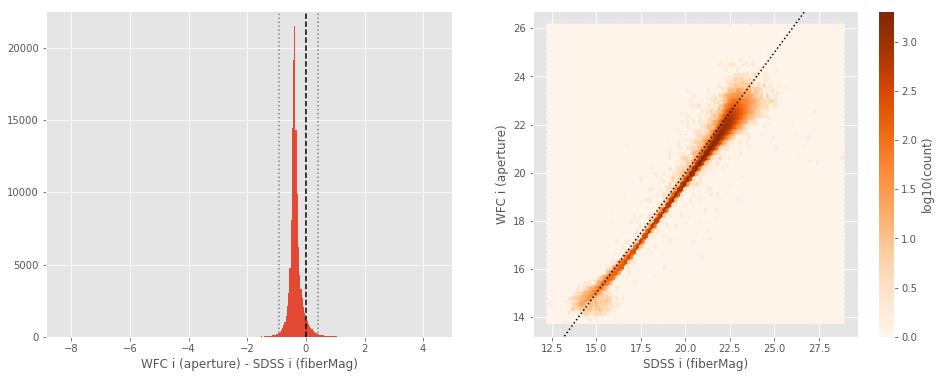

WFC i (total) - SDSS i (petroMag):
- Median: -0.39
- Median Absolute Deviation: 0.08
- 1% percentile: -0.9288136291503907
- 99% percentile: 0.4154920196533197


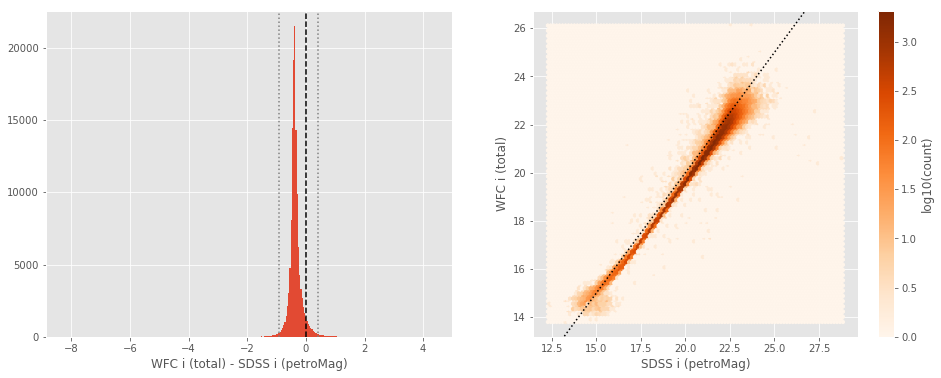

GPC1 i (aperture) - SDSS i (fiberMag):
- Median: -0.36
- Median Absolute Deviation: 0.09
- 1% percentile: -0.9859428405761719
- 99% percentile: 0.43151168823242997


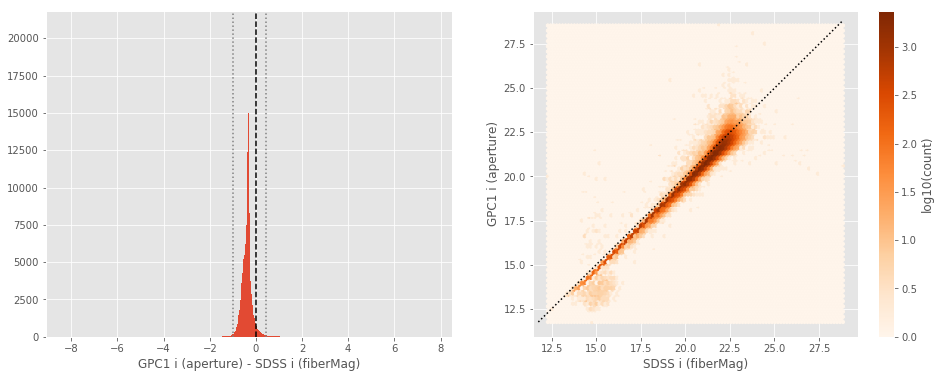

GPC1 i (total) - SDSS i (petroMag):
- Median: -0.36
- Median Absolute Deviation: 0.09
- 1% percentile: -0.9859428405761719
- 99% percentile: 0.43151168823242997


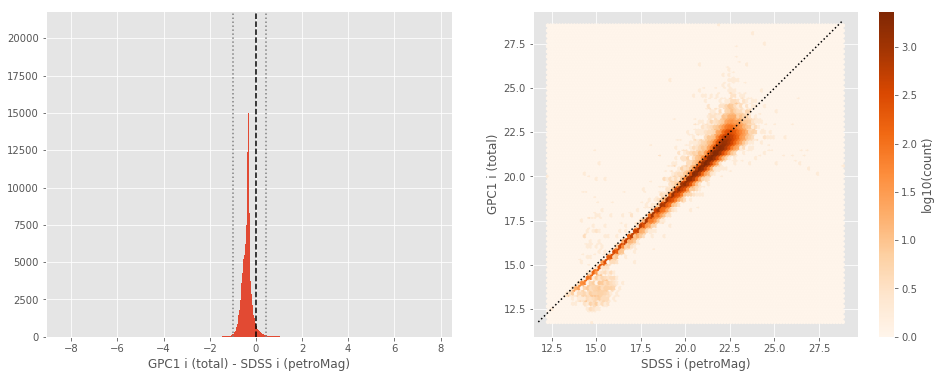

There are no overlapping magnitudes...
There are no overlapping magnitudes...
WFC z (aperture) - SDSS z (fiberMag):
- Median: -0.33
- Median Absolute Deviation: 0.11
- 1% percentile: -1.2395364761352539
- 99% percentile: 0.7405158233642565


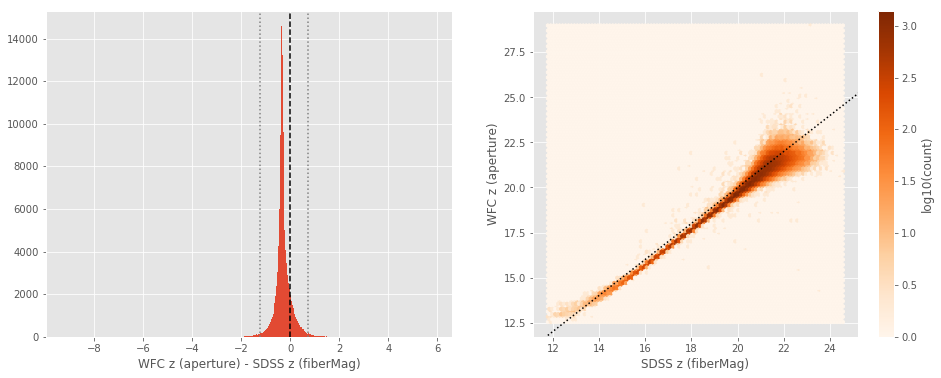

WFC z (total) - SDSS z (petroMag):
- Median: -0.33
- Median Absolute Deviation: 0.11
- 1% percentile: -1.2395364761352539
- 99% percentile: 0.7405158233642565


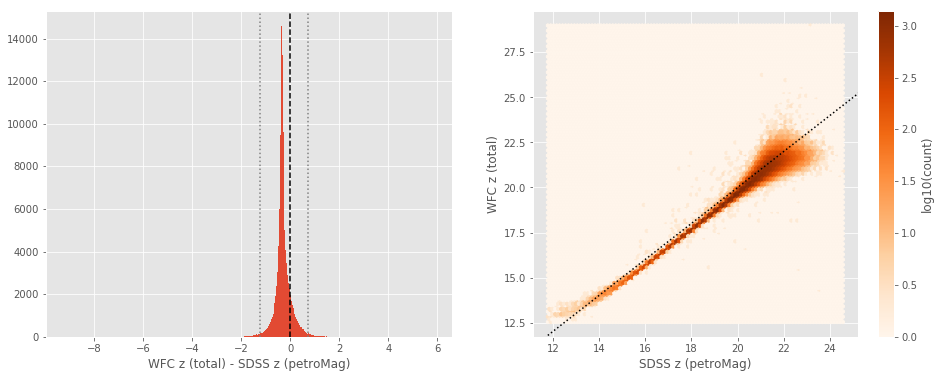

CFHT Megacam z (aperture) - SDSS z (fiberMag):
- Median: -0.19
- Median Absolute Deviation: 0.19
- 1% percentile: -1.0708820343017578
- 99% percentile: 3.6499409675597967


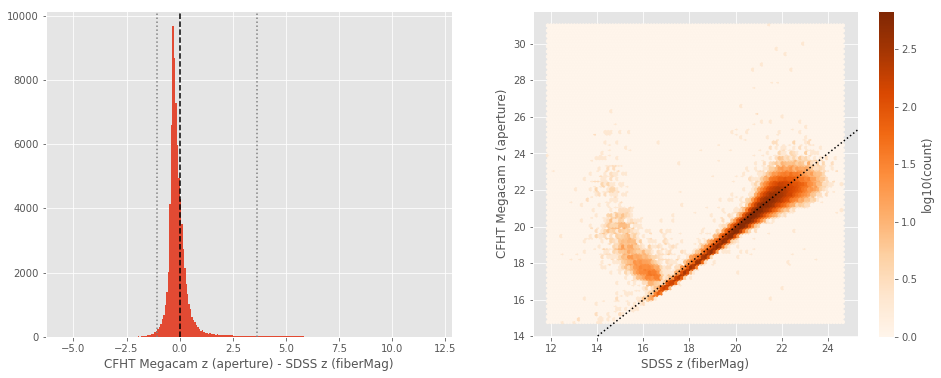

CFHT Megacam z (total) - SDSS z (petroMag):
- Median: -0.19
- Median Absolute Deviation: 0.19
- 1% percentile: -1.0708820343017578
- 99% percentile: 3.6499409675597967


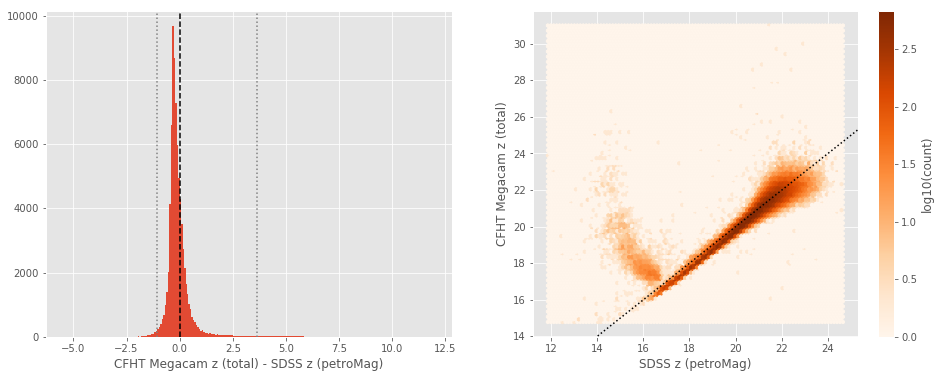

GPC1 z (aperture) - SDSS z (fiberMag):
- Median: -0.29
- Median Absolute Deviation: 0.13
- 1% percentile: -1.1712089157104493
- 99% percentile: 1.001730842590327


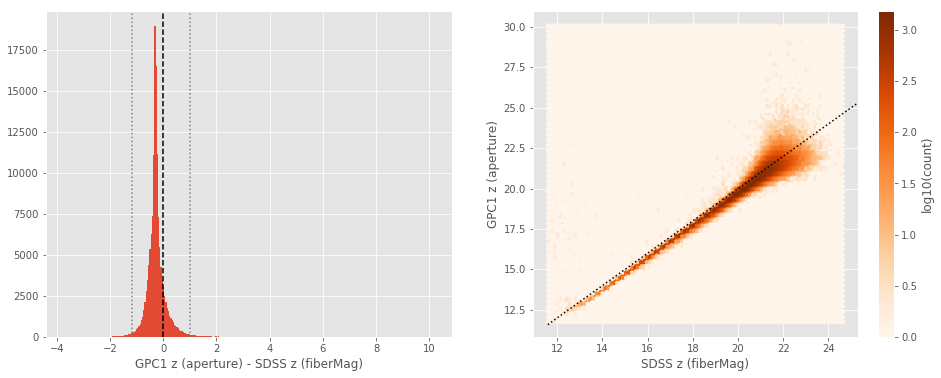

GPC1 z (total) - SDSS z (petroMag):
- Median: -0.29
- Median Absolute Deviation: 0.13
- 1% percentile: -1.1712089157104493
- 99% percentile: 1.001730842590327


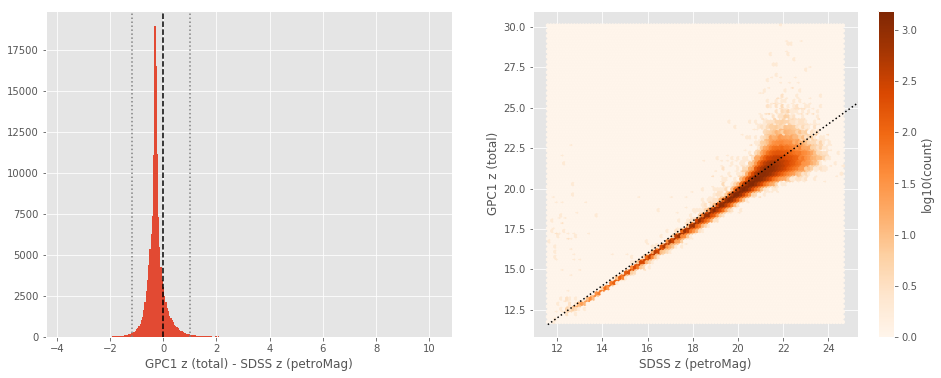

There are no overlapping magnitudes...
There are no overlapping magnitudes...


In [12]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap = sdss["fiberMag_{}".format(band[-1])]
        master_cat_mag_ap = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
    
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss["petroMag_{}".format(band[-1])]
        master_cat_mag_tot = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 765010 / 1783223 (42.90%)


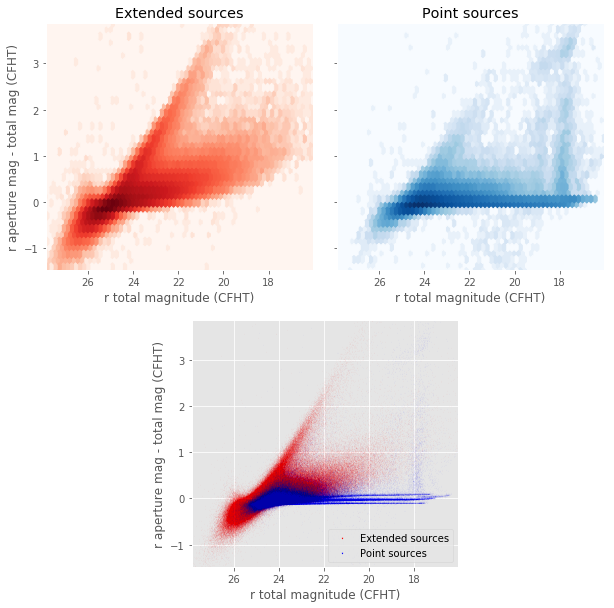

In [13]:
nb_ccplots(
    master_catalogue['m_cfht_megacam_r'],
    master_catalogue['m_ap_cfht_megacam_r'] - master_catalogue['m_cfht_megacam_r'],
    "r total magnitude (CFHT)", "r aperture mag - total mag (CFHT)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

Number of source used: 107958 / 1783223 (6.05%)


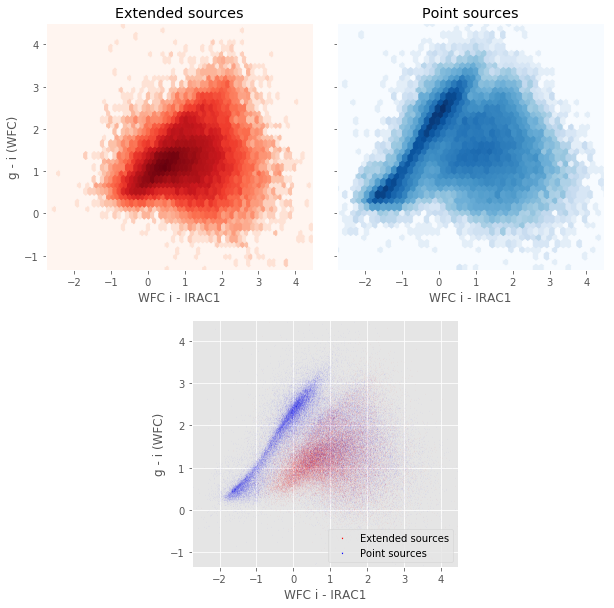

In [14]:
nb_ccplots(
    master_catalogue['m_wfc_i'] - master_catalogue['m_swire_irac1'],
    master_catalogue['m_wfc_g'] - master_catalogue['m_wfc_i'],
    "WFC i - IRAC1", "g - i (WFC)",
    master_catalogue["stellarity"]
)

Number of source used: 715764 / 1783223 (40.14%)


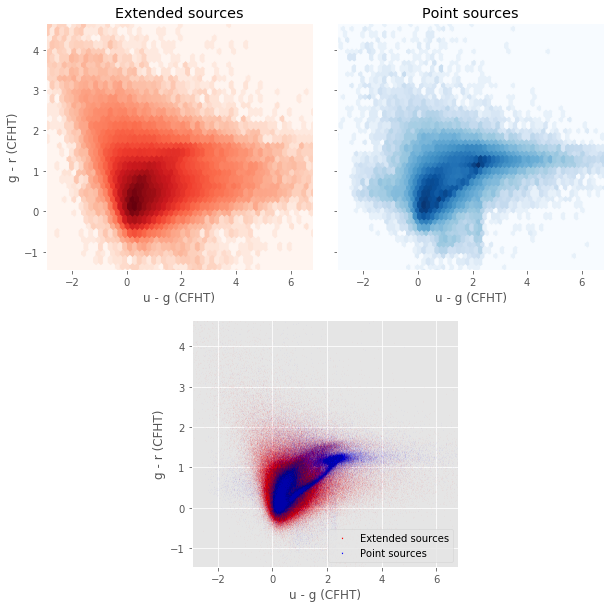

In [15]:
nb_ccplots(
    master_catalogue['m_cfht_megacam_u'] - master_catalogue['m_cfht_megacam_g'],
    master_catalogue['m_cfht_megacam_g'] - master_catalogue['m_cfht_megacam_r'],
    "u - g (CFHT)", "g - r (CFHT)",
    master_catalogue["stellarity"]
)

Number of source used: 19551 / 1783223 (1.10%)


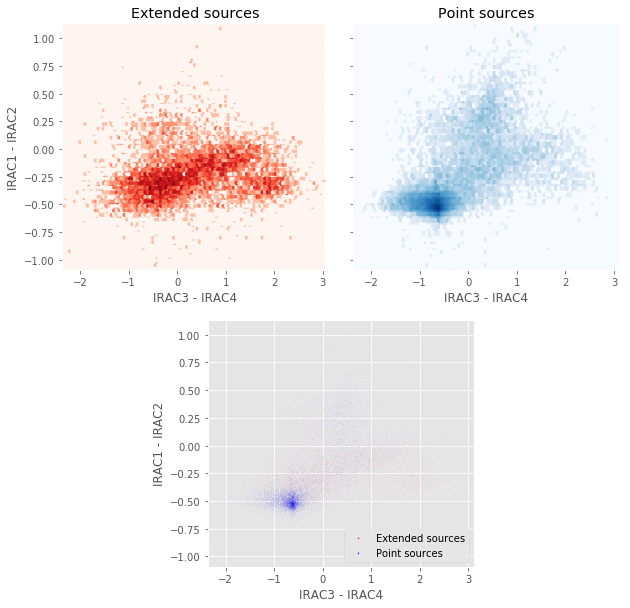

In [16]:
nb_ccplots(
    master_catalogue['m_irac3'] - master_catalogue['m_irac4'],
    master_catalogue['m_swire_irac1'] - master_catalogue['m_swire_irac2'],
    "IRAC3 - IRAC4", "IRAC1 - IRAC2",
    master_catalogue["stellarity"]
)